Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "Saloni Jain, Carly Kiang"

## To receive credit for this assignment, you must also fill out the [AI Use survey](https://forms.gle/ZhR5k8TdAeN8rj4CA)


---

In [2]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Abstract
* Introduction and Problem Description
* Brief discussion of Computational approach and import of any additional packages
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Abstract [10 pts]

Provide a 1-2 paragraph abstract of the project in the style of a research paper.  The abstract should contain

* A brief description of the problem
* A brief justification describing why this problem is important/interesting to you
* A general description of the computational approach
* A brief summary of what you did and what you learned


Predicting how infectious diseases spread is an important problem in public health, because better predictions can help guide policies that reduce infections and save lives. In this project, we study disease spread using two different approaches. We first use the SEIR model, a mathematical model that tracks how people move between four groups: susceptible, exposed, infected, and recovered. This model is useful because changing its parameters, such as how quickly a disease spreads, allows us to simulate different diseases and different policy choices like social distancing or quarantine. We also apply machine learning techniques to real outbreak datasets to see how well these models can predict the number of confirmed cases using information such as date, location, and previously reported cases. We implemented the SEIR model using numerical solvers and plotting tools in Python, and we trained linear regression and neural network models using scikit-learn. 

FINDINGS: By comparing the results from the SEIR simulations with the predictions from machine learning models, we learned how each method handles disease data and what each can and cannot tell us. Our findings show that mathematical models are helpful for understanding why an outbreak behaves a certain way, while machine learning models can be useful for short-term prediction when enough data is available.

## Introduction [15 pts]

In ~4-5 paragraphs, describe 
* The general problem you want to solve
* Why it is important and what you hope to achieve.

Please provide basic **references**, particularly if you are reproducing results from a paper. Also include any basic equations you plan to solve. 

Please use proper spelling and grammar. 

Modeling infection disease is an important way to investigate how diseases spread. Mathematical models can be used to predict mortality and lethality rates. One popular mathematically modelling method is the SIR model, which simulates disease spread over time by tracking the changes in the number of susceptible, infected, and recovered individuals within a population. An extension of the SIR model is the SEIR model, which tracks changes in the number of individuals exposed to the disease, in addition to the 3 other categories from the SIR model (susceptible, infected, recovered). Our goal is to use the SEIR model as a strategy for investigating different factors and policies that contribute to how diseases spread.

The different parameters of an SEIR model can be changed to reflect characteristics of certain diseases. For example, how fast a disease spread is related to a parameter called the basic reproduction number ($R_0$), which represents the number of people that can become infected from one diseased individual. Similarly, different social distancing measures and administrative strategies can be mathematically modelled. Investigating the behaviour of the SEIR model when different policies are applied can provide insight into what administrative strategies could be effective at limiting disease spread. 

In addition to the mathematical models, another method of analyzing infectious diseases is through machine learning models. There have been many recent advances in the applications of machine learning in infectious diseases. For example, For the purposes of this project, our goal is to investigate the effectiveness of existing machine learning techniques and models when applied to disease outbreak datasets. 

There are many different types of machine learning models (random forest, linear regression, neural networks). However, the performance of a machine learning model is highly dependent on the type of data it is trained on. Given common parameters collected in disease outbreak datasets, such as the number of infected indivduals and the date/time, investigating which kinds of models work well with these parameters would be helpful for understanding use cases and limitations of machine learning when applied to the field of epidemiology. Predictions from machine learning models can be used in conjunction with analysis from SEIR models to inform public health policy decisions.


Should we do a separate section on SEIR in relation to machine learning? Combining SEIR with machine learning? 




### References

Al Meslamani, A. Z., Sobrino, I., & de la Fuente, J. (2024). Machine learning in infectious diseases: potential applications and limitations. Annals of medicine, 56(1), 2362869. https://doi.org/10.1080/07853890.2024.2362869

Kiselev, I.N., Akberdin, I.R. & Kolpakov, F.A. (2023). Delay-differential SEIR modeling for improved modelling of infection dynamics. Sci Rep 13, 13439. https://doi.org/10.1038/s41598-023-40008-9

Jeong, B., Lee, Y.J. & Han, C.E. (2025). A simple yet effective approach for predicting disease spread using mathematically-inspired diffusion-informed neural networks. Sci Rep 15, 15000  https://doi.org/10.1038/s41598-025-98398-x

## Computational  Methods [10 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 




**Computational Methods: SEIR Models**

One computational method for investigating the spread of diseases is the SEIR model, which divides the population into different categories and relates them using a system of ordinary differential equations.

“S”: People who are susceptible to the disease

“E”: People who are exposed to the disease

“I” : People who are infected with the disease

“R”: People who are immune to the disease or passed away; removed from the system

The SEIR model assumes that individuals can follow the path $ S \rightarrow E \rightarrow I \rightarrow R$ across different states. 


To investigate the SEIR model, we will use computational methods such as:
- Computing the dynamical system using a Python method and scipy.integrate.solve_ivp
- Computing the dynamical system using the Range-Kutta iterative method
- Estimating parameter values for the SEIR/SIR models using rootfinding techniques
- Plotting SEIR models with varying parameters using matplotlib



**Computational Methods: Machine Learning Models**

In addition to looking into the SEIR model, will explore complementary machine learning models that can help with outbreak predictions. Our choice of datasets includes:

1. Covid-19 dataset from John Hopkins University (https://www.kaggle.com/datasets/brendaso/2019-coronavirus-dataset-01212020-01262020)

2. Covid 19 Time Series Data (https://www.kaggle.com/datasets/niketchauhan/covid-19-time-series-data)

The performance of linear regression models and neural network models will be used to predict the number of confirmed cases given other information, such as the date, location, and corresponding number of suspected cases, recovered cases, and deaths.

We will use the scikit-learn and pandas Python libraries to handle the entire machine learning pipeline. The scikit-learn library has built in functions to help with test/train/validation splitting for the datasets, as well as built in functions to help train various types of models.

We also plan to experiment with using interpolation to fill add synthetic data to augment the dataset, and compare the performance of models with and without interpolated data.


**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**


In [3]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import re
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root
from scipy.optimize import least_squares, minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




## Implementation [50 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. using `numpy.testing` routines, or a convergence plot) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

### SEIR model
The SEIR model can be described by the following 4 equations:
$$
\begin{align*}
\frac{dS}{dt} &= -\beta S \frac{I}{N}, \\
\frac{dE}{dt} &= \beta S \frac{I}{N} - \sigma E, \\
\frac{dI}{dt} &= \sigma E - \gamma I, \\
\frac{dR}{dt} &= \gamma I.
\end{align*}
$$

Similarly to the SIR model, the symbols $S,E,I,R$ represent the total number of individuals that are at each state, given a point in time $t$. The SEIR model is also a closed model; if the size of the entire population is $N$, then for any point in time $t$, we have:

$$S(t) + E(t) + I(t) + R(t) = N$$

If we want to do the same rescaling where $s = S/N$ (the proportion of individuals that are susceptible) and $R_0 = \beta / \gamma$ (the basic reproduction number), we get the following four equations:
$$
\begin{align}
\frac{ds}{dt} &= -\gamma R_0\, s\, i, \\
\frac{de}{dt} &= \gamma R_0\, s\, i - \sigma e, \\
\frac{di}{dt} &= \sigma e - \gamma i, \\
\frac{dr}{dt} &= \gamma i.
\end{align}
$$

(Source: https://julia.quantecon.org/continuous_time/seir_model.html, HW5)

The basic reproduction number $R_0$ represents how contagious a disease is at the start of an outbreak, when the number of people who are immune is 0. This can also be understood by how many secondary infections are caused by one infected indivdual.

The parameter $\sigma$ represents the incubation rate, which is the rate at which exposed individuals will become infectious. This is the inverse of the average incubation period, which is the time it takes for an individual in the exposed state to transition to the infected state. In other words, we can understand $\sigma$ to be the transition $E \rightarrow I$.

$$\sigma = \frac{1}{\text{incubation period}}$$

The parameter $\gamma$ represents the recovery rate, which is the rate at which infected individuals recover. This is the inverse of the infectious period. Similarly, we can understand $\gamma$ to be the transition $I \rightarrow R$.

$$\gamma = \frac{1}{\text{infectious period}}$$

This system of rescaled equations can be written as a vector ODE

$$\frac{d\mathbf{u}}{dt} = \mathbf{F}(t,\mathbf{u}, \gamma, R_0, \sigma)\quad \mathbf{u}(0)=\mathbf{u}_0
$$

where

$$
    \mathbf{F}(t,\mathbf{u}, \gamma, R_0, \sigma) = 
    \begin{bmatrix} 
    -\gamma R_0\, s\, i\\
     \gamma R_0\, s\, i - \sigma e \\ 
     \sigma e - \gamma i \\ 
     \gamma i \\ 
     \end{bmatrix}, \quad \mathbf{u}(t) = \begin{bmatrix} 
   s(t)\\
    e(t) \\ 
    i(t) \\ 
    r(t)\\ 
\end{bmatrix}
$$


Using this system of rescaled equations, we can write a function that will return the RHS of the scaled dynamical system $\mathbf{F}(t,\mathbf{u}, \gamma, R_0, \sigma)$.


In [4]:
def F(t, u, gamma, R_0, sigma):
    """ RHS of scaled SEIR model of Kermack and McKendrick
    
    parameters
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: numpy array
            array of scaled [ s, i, r ] values such that sum(u) = 1 
            (and s,i, r are fractions of the total population N)
        s_star: float
            scaled critical susceptible population = \beta/(\alpha N)
            
    returns:
        F(u): numpy array
    """
    # YOUR CODE HERE
    s, e, i, r = u
    return numpy.array([-gamma*R_0*s*i, 
                        gamma*R_0*s*i - sigma*e, 
                        sigma*e - gamma*i,
                        gamma*i])


As an example, we can show how the function F can be used with solve_ivp to create a plot showing the evolution of $s(t)$, $i(t)$, ${r}(t)$ over time $t\in[0, 50]$:

Peak infection at t = 47.247, i = 0.163290


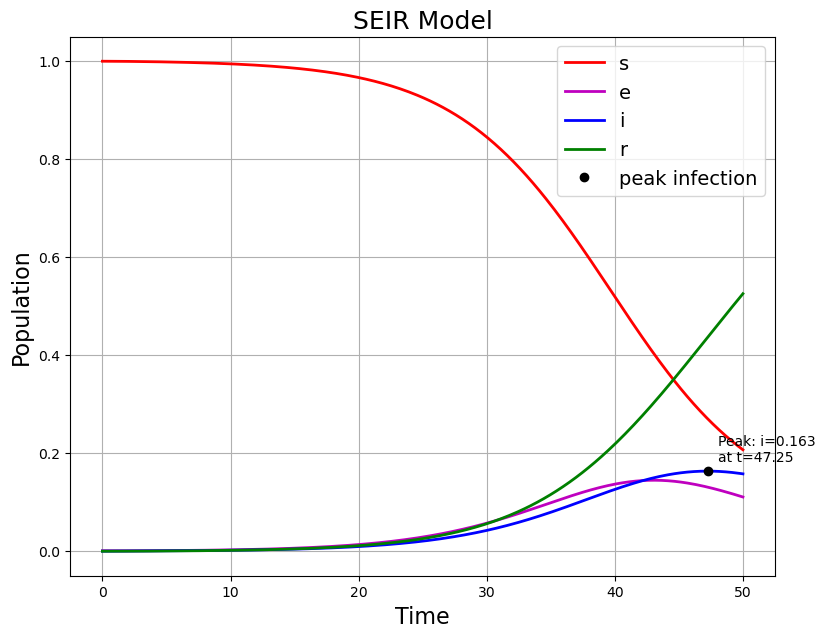

In [6]:
# Event: infection peak (di/dt = 0 ↔ σe - γi = 0)
def infection_peak(t, u, gamma, R_0, sigma):
    s, e, i, r = u
    return sigma*e - gamma*i

infection_peak.terminal = False
infection_peak.direction = -1    # detect downward crossing (peak)

# Parameters
gamma = 1/5
R_0 = 3.0
sigma = 1/4

# Initial conditions
e_0 = 1e-3
i_0 = 1e-4
s_0 = 1 - e_0 - i_0
u_0 = [s_0, e_0, i_0, 0.0]

t_max = 50

# Solve
sol = solve_ivp(
    F, [0, t_max], u_0,
    args=(gamma, R_0, sigma),
    rtol=1e-6, atol=1e-9,
    dense_output=True,
    events=infection_peak
)


# Plot
t = numpy.linspace(0, t_max, 300)
z = sol.sol(t)

fig = plt.figure(figsize=(20,7))
axes = fig.add_subplot(1,2,1)

axes.plot(t, z[0], 'r', linewidth=2, label='s')
axes.plot(t, z[1], 'm', linewidth=2, label='e')
axes.plot(t, z[2], 'b', linewidth=2, label='i')
axes.plot(t, z[3], 'g', linewidth=2, label='r')

# Extract peak
if len(sol.t_events[0]) == 0:
    print("No peak detected.")
else:
    t_peak = sol.t_events[0][0]
    i_peak = sol.sol(t_peak)[2]
    print(f"Peak infection at t = {t_peak:.3f}, i = {i_peak:.6f}")

    axes.plot(t_peak, i_peak, 'ko', label='peak infection')
    axes.annotate(f'Peak: i={i_peak:.3f}\nat t={t_peak:.2f}',
                  xy=(t_peak, i_peak), xytext=(t_peak+0.8, i_peak+0.02))
    
axes.set_xlabel("Time", fontsize=16)
axes.set_ylabel("Population", fontsize=16)
axes.set_title("SEIR Model", fontsize=18)
axes.grid()
axes.legend(fontsize=14)

plt.show()

Other than solve_ivp, we can also use a constant step-size method to solve the system of ODEs. In the example code below, we use 



In [7]:
def my_ode_solver(f, t_span, u0, N):
    """ implement constant step size ODE integrator using an RK4 method
    
    parameters
    ----------
        f: calleable
            vector valued function with interface f(t,u, gamma, R, sigma) where u is the state vector
        t_span: float list or array (or tuple)
            array holding range of times to integrate over t_span = [ t_min, t_max]
        u0:  numpy array
            array of initial conditions
        N: integer
            number of time steps to take 
            
    returns:
    --------
        t: numpy array
            array of timesteps from t_min to t_max of length N
        u: numpy array of shape (len(u0), len(t))
            solution array,  the solution at timestep i should be u[:,i]
    """
    t = numpy.linspace(t_span[0], t_span[1], N)
    delta_t = t[1] - t[0]
    
    u = numpy.empty((len(u0), len(t)))
    u[:, 0] = u0
    
    # RK4 code from class
    for n in range(N - 1):
        u_n = u[:, n]
        t_n = t[n]
        
        K1 = delta_t * f(t_n, u_n)
        K2 = delta_t * f(t_n + delta_t / 2., u_n + K1 / 2.)
        K3 = delta_t * f(t_n + delta_t / 2., u_n + K2 / 2.)
        K4 = delta_t * f(t_n + delta_t, u_n + K3)
        
        u[:, n + 1] = u_n + (K1 + 2 * (K2 + K3) + K4) / 6.
    
    return t, u
    
# YOUR CODE HERE


N = 100 
gamma = 1/5
R0 = 2.5
sigma = 1/4

s0 = 0.999
e0 = 0.001
i0 = 0.0
r0 = 0.0
u0 = numpy.array([s0, e0, i0, r0])

# time span and steps
t_span = (0, 160)
N = 2000

f = lambda t, u: F(t, u, gamma, r0, sigma)

t, u = my_ode_solver(f, t_span, u0, N)

s, e, i, r = u


In [8]:
# Testing cell
# TODO
t_span = [0., 50.]
i_0 = 1e-5
e_0 = 0.0      # or something small if you want
r_0 = 0.0
s_0 = 1 - i_0 - e_0 - r_0
u_0 = numpy.array([s_0, e_0, i_0, r_0])

t, u = my_ode_solver(f, t_span, u_0, N)

# There was a hidden line here implementing sol = solve_ivp to get the "True" solution
sol = solve_ivp(f, t_span, u_0, method='RK45', dense_output=True, rtol=1.e-6, atol = 1.e-8)

numpy.testing.assert_allclose(u, sol.sol(t), rtol=1.e-4, atol=1.e-5)
print('success!')

success!


## Trying SEIR on first dataset

### SEIR Model: Rootfinding Parameters Based on Data
Although we showed an example of a plotted SEIR model given arbitrary parameter values, given real-life data, it is also helpful to use the data to calculate the values of the parameters $\beta, \sigma, \gamma$, so we can feed these parameters back into SEIR models to make analysis specific to a certain disease or region.

We can use the JHU Covid-19 Dataset as an example. The JHU Covid-19 dataset collects data from various countries spanning from January 22nd to January 26th 2020. One limitation of this dataset though, is that there is not data collected on the exposed individuals. Hence, it would be better suited for an SIR model. Although we spent some time searching for a disease dataset that would have data on individuals from all four S, E, I, R categories, we were unable to find any. This indicates a limitation of trying estimate the parameters. For the purposes of this project, because we are focusing on the SEIR model. we will substitute in an estimated value for E. We can follow these steps to estimate what the parameters are:

1. Clean the JHU data. For each date and/or country, calculated the cumulative
    - Confirmed cases
    - Infected cases
    - Suspected cases
    - Death cases
2. Find initial conditions for each S, E, I, R value given the cleaned data
3. Define an error function for rootfinding
4. Provide initial guesses for parameters
5. Solve using a rootfinding technique, such as least_squares from rootfinding.solve.ivp

These steps are coded below:


In [9]:
#-------------------------------------------------
# STEP 1: CLEAN THE JHU DATA
#-------------------------------------------------
# 1) Read CSV and parse dates
df = pd.read_csv("2019_nC0v_20200121_20200126 - SUMMARY.csv", dtype=str)

# Convert date column to datetime # format = %m/%d/%Y %H:%M'

def clean_date(x):
    # 1. Extract only the MM/DD/YY or MM/DD/YYYY portion
    match = re.search(r'(\d+/\d+/\d+)', x)
    if not match:
        return None  # or raise an error
    date_str = match.group(1)
    
    # 2. Fix 2-digit years (your rule: always 2020)
    parts = date_str.split('/')
    if len(parts[2]) == 2:      # e.g., "20"
        parts[2] = '2020'
    
    # 3. Return unified format: M/D/YYYY
    return f"{int(parts[0])}/{int(parts[1])}/{parts[2]}"

df['Date last updated'] = df['Date last updated'].astype(str).apply(clean_date)
df['Date last updated'] = pd.to_datetime(df['Date last updated'], format="%m/%d/%Y")

# Quick sanity: show rows with unparsable dates
bad_dates = df[df['Date last updated'].isna()]
if len(bad_dates):
    print("WARNING: some rows have unparsable dates (check formatting):")
    print(bad_dates.head())

# 2) Normalize and clean up region fields
df['Province/State'] = df['Province/State'].fillna("").replace("", "Unknown")
df['Country'] = df['Country'].fillna("Unknown")

# 3) Convert numeric columns to numeric, treating blanks as NaN -> fill with 0
for col in ['Confirmed', 'Suspected', 'Recovered', 'Deaths']:
    # remove stray whitespace, convert to numeric
    df[col] = pd.to_numeric(df[col].replace(r'^\s*$', numpy.nan, regex=True), errors='coerce')
    df[col] = df[col].fillna(0).astype(int)

# 4) Aggregate by date (global totals)
daily = df.groupby('Date last updated')[['Confirmed','Recovered','Deaths','Suspected']].sum()
daily = daily.sort_index()  # ascending by date

# Now we have daily cumulative totals:
# C(t) = Confirmed cumulative
daily.rename(columns={'Confirmed': 'C_cum', 'Recovered': 'R_cum', 'Deaths': 'D_cum', 'Suspected': 'Suspected_cum'}, inplace=True)

# 5) Compute active infected I(t) = Confirmed - Recovered - Deaths
daily['I_cum'] = daily['C_cum'] - daily['R_cum'] - daily['D_cum']
daily['I_cum'] = daily['I_cum'].clip(lower=0)   # avoid negatives from dirty data

# 6) If you want daily new cases (incidence), diff the cumulative counts
daily['C_new'] = daily['C_cum'].diff().fillna(daily['C_cum'])  # first day: take cumulative as new
daily['R_new'] = daily['R_cum'].diff().fillna(daily['R_cum'])
daily['D_new'] = daily['D_cum'].diff().fillna(daily['D_cum'])

# 7) Simple sanity checks
print("Date range:", daily.index.min(), "->", daily.index.max())
print("Sample days:\n", daily.head())

# 8) Per-country time series (if you want country-level series)
country_daily = (df.groupby(['Country','Date last updated'])[['Confirmed','Recovered','Deaths','Suspected']]
                   .sum()
                   .sort_index()
                   .rename(columns={'Confirmed':'C_cum','Recovered':'R_cum','Deaths':'D_cum'}))
# Convert groupby index to DataFrame with pivot if desired:
country_ts = country_daily.reset_index().pivot(index='Date last updated', columns='Country', values='C_cum')
# same can be done for I_cum by computing C-R-D per country
country_daily = country_daily.reset_index()
country_daily['I_cum'] = country_daily['C_cum'] - country_daily['R_cum'] - country_daily['D_cum']
country_daily = country_daily.set_index(['Country','Date last updated']).sort_index()

# 9) Save cleaned daily timeseries to working directory
daily.to_csv("jhu_daily_aggregated.csv")         # global daily
country_daily.to_csv("jhu_country_daily_aggregated.csv")  # country+date rows

# 10) (Optional) Smooth daily new cases with rolling mean for use in parameter fitting
daily['C_new_smoothed'] = daily['C_new'].rolling(window=7, min_periods=1, center=True).mean()


Date range: 2020-01-21 00:00:00 -> 2020-01-26 00:00:00
Sample days:
                    C_cum  R_cum  D_cum  Suspected_cum  I_cum   C_new  R_new  \
Date last updated                                                             
2020-01-21           332      0      0            169    332   332.0    0.0   
2020-01-22           555      0      0            137    555   223.0    0.0   
2020-01-23           653     30     18            144    605    98.0   30.0   
2020-01-24          1822     70     52            274   1700  1169.0   40.0   
2020-01-25          4811    126    139            883   4546  2989.0   56.0   

                   D_new  
Date last updated         
2020-01-21           0.0  
2020-01-22           0.0  
2020-01-23          18.0  
2020-01-24          34.0  
2020-01-25          87.0  


In [10]:
# choose a region or global
ts = daily  # or daily_country.loc['United States'] after pivoting

# convert dates to integer days from start
t0 = ts.index.min()
t = numpy.array([(d - t0).days for d in ts.index])

# arrays for fitting
C_cum = ts['C_cum'].values.astype(float)
I_cum = ts['I_cum'].values.astype(float)
R_cum = ts['R_cum'].values.astype(float)
D_cum = ts['D_cum'].values.astype(float)

print("Confirmed cumulative: ")
print(C_cum)
print("Infected cumulative: ")
print(I_cum)
print("Recovered cumulative: ")
print(R_cum)
print("Death cumulative: ")
print(D_cum)


Confirmed cumulative: 
[ 332.  555.  653. 1822. 4811. 2116.]
Infected cumulative: 
[ 332.  555.  605. 1700. 4546. 2008.]
Recovered cumulative: 
[  0.   0.  30.  70. 126.  52.]
Death cumulative: 
[  0.   0.  18.  52. 139.  56.]


### Simplified SIR Model Attempt


Estimated SIR Parameters
β (transmission) = 0.7382844194606769
γ (recovery)     = 0.05382359232298467
Rootfinding success: True
Message: `ftol` termination condition is satisfied.


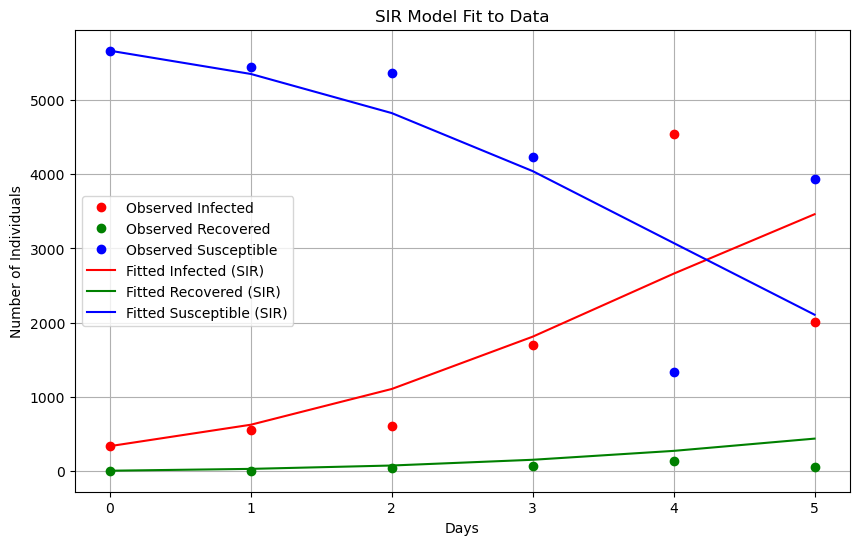

In [11]:
# -----------------------------
# 1) Load your data arrays
# -----------------------------
# t_data → integer days [0,1,2,...]
# I_data → active infections
# R_data → recovered
# N      → total population

t_data = t.astype(float)
I_data = I_cum.astype(float)
R_data = R_cum.astype(float)

N = 6_000 # 2_000_000_000
S_data = (N - I_data - R_data).astype(float)

# Initial conditions
I0 = float(I_data[0])
R0 = float(R_data[0])
S0 = N - I0 - R0
y0 = [S0, I0, R0]  # S, I, R

# -----------------------------
# 2) Define SIR ODE system
# -----------------------------
def sir_rhs(t, y, beta, gamma):
    S, I, R = y
    dS = -beta * S * I / N
    dI = beta * S * I / N - gamma * I
    dR = gamma * I
    return [dS, dI, dR]

def solve_sir(params):
    beta, gamma = params
    sol = solve_ivp(
        lambda t, y: sir_rhs(t, y, beta, gamma),
        t_span=(t_data[0], t_data[-1]),
        y0=y0,
        t_eval=t_data,
        rtol=1e-6,
        atol=1e-6,
    )
    return sol.y  # S, I, R

# -----------------------------
# 3) Define residual function for least_squares
# -----------------------------
def residual_sir(params):
    S_model, I_model, R_model = solve_sir(params)
    err_I = I_model - I_data
    err_R = R_model - R_data
    return numpy.concatenate([err_I, err_R])

# -----------------------------
# 4) Initial parameter guesses
# -----------------------------
beta0 = 0.5
gamma0 = 0.1
params0 = numpy.array([beta0, gamma0])

# -----------------------------
# 5) Fit parameters
# -----------------------------
solution = least_squares(residual_sir, params0)
beta_hat, gamma_hat = solution.x

print("\n==========================")
print("Estimated SIR Parameters")
print("==========================")
print("β (transmission) =", beta_hat)
print("γ (recovery)     =", gamma_hat)
print("Rootfinding success:", solution.success)
print("Message:", solution.message)

# -----------------------------
# 6) Solve SIR model with fitted parameters for plotting
# -----------------------------
S_fit, I_fit, R_fit = solve_sir([beta_hat, gamma_hat])

# -----------------------------
# 7) Plot results
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(t_data, I_data, 'ro', label='Observed Infected')
plt.plot(t_data, R_data, 'go', label='Observed Recovered')
plt.plot(t_data, S_data, 'bo', label='Observed Susceptible')
plt.plot(t_data, I_fit, 'r-', label='Fitted Infected (SIR)')
plt.plot(t_data, R_fit, 'g-', label='Fitted Recovered (SIR)')
plt.plot(t_data, S_fit, 'b-', label='Fitted Susceptible (SIR)')
plt.xlabel('Days')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Fit to Data')
plt.legend()
plt.grid(True)
plt.show()

The plot compares observed COVID-19 infection and recovery data with predictions from an SIR model fit. Red dots represent observed infected cases, and green dots represent observed recovered cases, while solid lines show the model’s predicted infected and recovered populations over time. The model’s infected curve follows the general upward trend of the data reasonably well, capturing the overall growth pattern, though it slightly under- or overestimates some points.

The fit for recovered cases is less accurate. The observed recoveries are low and relatively flat, but the model predicts a smooth increase. This discrepancy may stem from limited recovery data, delays in reporting recoveries, or assumptions in the model that don’t perfectly reflect reality.

Several factors may explain the deviations, including the small size of the dataset (only a few days), reporting lags, simplifications inherent in the SIR model (e.g., constant parameters and homogeneous mixing), and uncertainties in population size or initial conditions. Despite these limitations, the model provides a reasonable approximation of infection dynamics and could be improved with more data, refined assumptions, or by using more complex models like SEIR if better data on exposed individuals become available.

A reasonable range for the transmission rate $\beta$ and the recovery rate $\gamma$ in a classic SIR model can be derived from well-studied properties of early-stage COVID-19. The recovery rate $\gamma$ is the inverse of the infectious period, which for early COVID was typically 5-14 days; therefore, most SIR models use $\gamma$ values between $0.07$ and $0.20$ per day. The transmission rate $\beta$ is related to the basic reproduction number $R_0$ through the relation $R_0 = \beta / \gamma$. Since early COVID estimates placed $R_0$ in the range 2--3, and $\gamma \approx 0.1$--$0.14$, appropriate $\beta$ values usually fall between $0.2$ and $0.5$ per day. These ranges yield realistic epidemic trajectories in which the infected population rises and eventually peaks as susceptibles are depleted. In contrast, the fitted values in our SIR model, $\beta \approx 0.74$ and $\gamma \approx 0.054$, imply an implausible basic reproduction number of about $R_0 \approx 14$. Such an extreme value produces nearly unchecked exponential growth and prevents the model from generating the observed peak in infections, demonstrating that these parameter estimates are biologically unrealistic.

### SEIR: Solving for β (transmission rate) using predefined incubation and recovery rate


Estimated SEIR Parameter
β (transmission) = 2.4372304897897714
σ (fixed)        = 0.2
γ (fixed)        = 0.1
--------------------------
Rootfinding success: True
Message: `ftol` termination condition is satisfied.


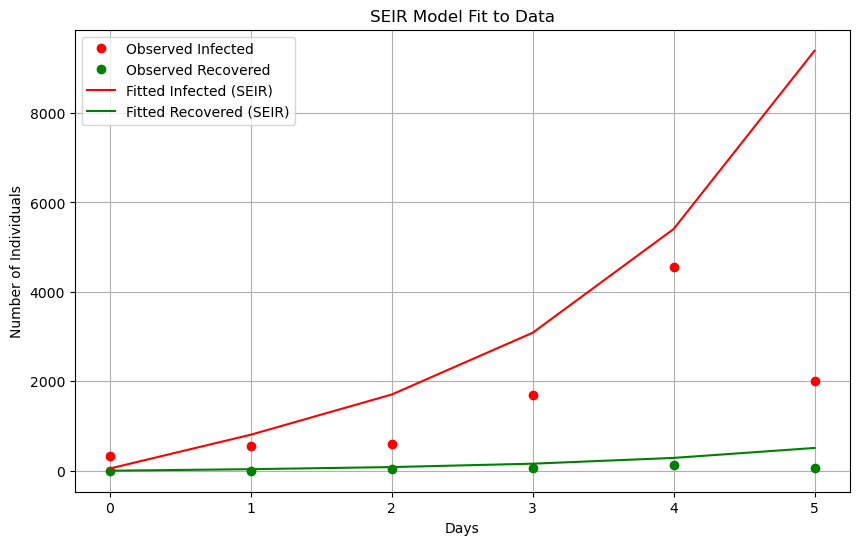

In [12]:
sigma = 1/5
gamma = 1/10
N = 2_000_000_000  # Estimated based on combined population of countries/regions in dataset

t_data = t.astype(float)
I_data = I_cum.astype(float)
R_data = R_cum.astype(float)

C_data = I_data + R_data # combined data

I0 = float(I_data[0])
R0 = float(R_data[0])
E0 = 50                        # guessed exposed
S0 = N - I0 - R0 - E0              # susceptible

y0 = [S0, E0, I0, R0]

def seir_rhs(t, y, beta, sigma, gamma, N):
    S, E, I, R = y
    dS = -beta * S * I / N
    dE = beta * S * I / N - sigma * E
    dI = sigma * E - gamma * I
    dR = gamma * I
    return [dS, dE, dI, dR]

def solve_seir(beta):
    sol = solve_ivp(
        lambda t, y: seir_rhs(t, y, beta, sigma, gamma, N),
        t_span=(t_data[0], t_data[-1]),
        y0=y0,
        t_eval=t_data,
        rtol=1e-6,
        atol=1e-6,
    )
    return sol.y   # S, E, I, R

def residual_beta(beta_array):
    beta = beta_array[0]
    S, E, I_model, R_model = solve_seir(beta)
    C_model = I_model + R_model
    return C_model - C_data
    # return numpy.concatenate([I_model - I_data, R_model - R_data])

beta0 = numpy.array([0.5])
solution = least_squares(residual_beta, beta0)
beta_hat = solution.x[0]

print("\n==========================")
print("Estimated SEIR Parameter")
print("==========================")
print("β (transmission) =", beta_hat)
print("σ (fixed)        =", sigma)
print("γ (fixed)        =", gamma)
print("--------------------------")
print("Rootfinding success:", solution.success)
print("Message:", solution.message)

# -----------------------------
# 6) Solve SEIR model with fitted parameters for plotting
# -----------------------------
S_fit, I_fit, E_fit, R_fit = solve_seir(beta_hat)

# -----------------------------
# 7) Plot results
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(t_data, I_data, 'ro', label='Observed Infected')
plt.plot(t_data, R_data, 'go', label='Observed Recovered')
# plt.plot(t_data, S_data, 'bo', label='Observed Susceptible')
plt.plot(t_data, I_fit, 'r-', label='Fitted Infected (SEIR)')
plt.plot(t_data, R_fit, 'g-', label='Fitted Recovered (SEIR)')
# plt.plot(t_data, S_fit, 'b-', label='Fitted Susceptible (SEIR)')
plt.xlabel('Days')
plt.ylabel('Number of Individuals')
plt.title('SEIR Model Fit to Data')
plt.legend()
plt.grid(True)
plt.show()

The parameter set $\beta = 2.437$, $\sigma = 0.2$, and $\gamma = 0.1$ implies epidemic dynamics that are substantially more aggressive than what is typically associated with early COVID-19. The fixed incubation rate $\sigma = 0.2$ corresponds to a latent period of $1/\sigma = 5$ days, which is reasonable for COVID-like diseases. Likewise, fixing the recovery rate at $\gamma = 0.1$ assumes an infectious period of $1/\gamma = 10$ days, well within biologically plausible bounds. However, the transmission rate $\beta = 2.437$ is extremely large relative to these fixed values. In an SEIR model, the basic reproduction number is given by $R_0 = \beta / \gamma$, so this parameter set yields
$$
R_0 = \frac{2.437}{0.1} \approx 24.4,
$$
which is far outside any realistic range for COVID-19 or most human respiratory infections. For comparison, early COVID-19 strains typically had $R_0$ values between 2 and 3, and even highly transmissible diseases such as measles reach values around 12--18. An $R_0$ above 20 implies an implausibly explosive outbreak in which nearly every contact leads to infection. Such a system would produce extremely steep exponential growth and rapid depletion of susceptibles, inconsistent with observed epidemic data. Therefore, while the fixed incubation and recovery rates are reasonable, the estimated transmission rate is not biologically meaningful and likely indicates an issue with parameter identifiability, data scaling, or model specification.

### SEIR: Solving for transmission, incubation, and recovery rate from the data


Estimated SEIR Parameters
β (transmission)      = 0.4466023081862077
σ (incubation rate)   = 6869.660224972708
γ (recovery rate)     = 0.015315432896989738
--------------------------
Rootfinding success: True
Message: `ftol` termination condition is satisfied.


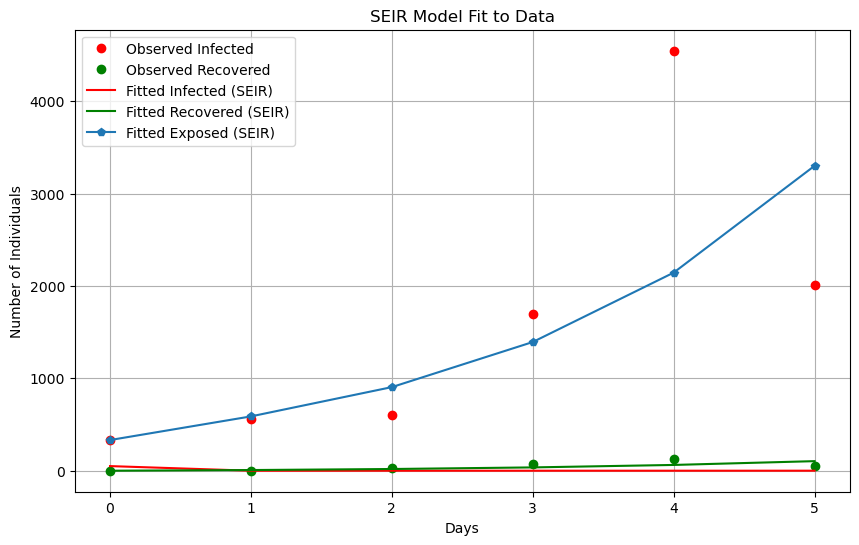

In [13]:
# ----------------------------------------------------------------------
# STEP 1 CONTINUED: Load arrays derived earlier from the JHU dataset
#    These should already exist from your data-cleaning code:
#       t       → integer days (e.g. [0,1,2,...])
#       I_cum   → active infections (I)
#       R_cum   → recovered (R)
#       C_cum   → confirmed cumulative
#       D_cum   → deaths cumulative
# ----------------------------------------------------------------------

# Example structure, REMOVE these if using the real arrays:
# t      = np.array([...])
# I_cum  = np.array([...])
# R_cum  = np.array([...])
# C_cum  = np.array([...])
# D_cum  = np.array([...])

# Ensure arrays are floats
t_data = t.astype(float)
I_data = I_cum.astype(float)
R_data = R_cum.astype(float)


# Population size
N = 2_000_000_000  # Estimated based on combined population of countries/regions in dataset


# ----------------------------------------------------------------------
# STEP 2: INITIAL CONDITIONS FROM FIRST ELEMENT IN ARRAYS
# ----------------------------------------------------------------------
I0 = float(I_data[0])
R0 = float(R_data[0])
E0 = 50                        # guessed exposed
S0 = N - I0 - R0 - E0              # susceptible

y0 = [S0, E0, I0, R0]



# Define the SEIR ODE system
def seir_rhs(t, y, beta, sigma, gamma):
    S, E, I, R = y
    dS = -beta * S * I / N
    dE = beta * S * I / N - sigma * E
    dI = sigma * E - gamma * I
    dR = gamma * I
    return [dS, dE, dI, dR]


def solve_seir(params):
    beta, sigma, gamma = params
    
    sol = solve_ivp(
        lambda t, y: seir_rhs(t, y, beta, sigma, gamma),
        t_span=(t_data[0], t_data[-1]),
        y0=y0,
        t_eval=t_data,
        rtol=1e-6,
        atol=1e-6,
    )
    return sol.y  # S, E, I, R → shape (4, len(t_data))


# ----------------------------------------------------------------------
# STEP 3: DEFINE ERROR FUNCTION FOR ROOTFINDING
# ----------------------------------------------------------------------
def residual(params):
    beta, sigma, gamma = params
    
    S, E, I_model, R_model = solve_seir(params)
    
    # residuals: model minus data
    err_I = I_model - I_data
    err_R = R_model - R_data
    
    # return a 2N-long vector
    return numpy.concatenate([err_I, err_R])


# ----------------------------------------------------------------------
# STEP 4: ESTABLISH INITAL PARAMETER GUESSES
# ----------------------------------------------------------------------
beta0  = 0.5        # transmission rate estimate
sigma0 = 1/5        # incubation rate ≈ 1/5 days
gamma0 = 1/10       # recovery rate ≈ 1/10 days

params0 = numpy.array([beta0, sigma0, gamma0])


# ----------------------------------------------------------------------
# STEP 5: SOLVE USING ROOTFINDING TECHNIQUE
# ----------------------------------------------------------------------
# solution = root(residual, params0, method='hybr')
# cant use root, because we have 12 data points instead of 3
solution = least_squares(residual, params0, method='trf')

beta_hat, sigma_hat, gamma_hat = solution.x

print("\n==========================")
print("Estimated SEIR Parameters")
print("==========================")
print("β (transmission)      =", beta_hat)
print("σ (incubation rate)   =", sigma_hat)
print("γ (recovery rate)     =", gamma_hat)
print("--------------------------")
print("Rootfinding success:", solution.success)
print("Message:", solution.message)

# -----------------------------
# 6) Solve SEIR model with fitted parameters for plotting
# -----------------------------
S_fit, I_fit, E_fit, R_fit = solve_seir([beta_hat, sigma_hat, gamma_hat])

# -----------------------------
# 7) Plot results
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(t_data, I_data, 'ro', label='Observed Infected')
plt.plot(t_data, R_data, 'go', label='Observed Recovered')
# plt.plot(t_data, S_data, 'bo', label='Observed Susceptible')
plt.plot(t_data, I_fit, 'r-', label='Fitted Infected (SEIR)')
plt.plot(t_data, R_fit, 'g-', label='Fitted Recovered (SEIR)')
# plt.plot(t_data, S_fit, 'b-', label='Fitted Susceptible (SEIR)')
plt.plot(t_data, E_fit, 'p-', label='Fitted Exposed (SEIR)')
plt.xlabel('Days')
plt.ylabel('Number of Individuals')
plt.title('SEIR Model Fit to Data')
plt.legend()
plt.grid(True)
plt.show()

The extremely high estimated value for the incubation rate (σ ≈ 6869) arises primarily from the lack of data on the Exposed (E) compartment. The SEIR model tracks Susceptible, Exposed, Infected, and Recovered individuals, but the dataset only provides observed numbers for Infected (I) and Recovered (R). Without information on the exposed population, the optimizer cannot reliably estimate σ. To compensate, it drives σ to an unrealistically large value, effectively making the exposed period almost instantaneous and reducing the model behavior to something closer to an SIR model.

Additionally, this is an example of a parameter identifiability problem. When multiple parameters are being estimated from limited data, the model can find mathematically valid solutions that minimize residual error but are not physically meaningful. In this case, the very small recovery rate (γ ≈ 0.015) combined with the inflated σ reflects the solver adjusting parameters to fit the observed I and R data while “ignoring” the unobserved E compartment.

This behavior highlights the limitations of applying a full SEIR model to datasets that lack complete compartmental information.

We can repeat the same steps above and explore the estimated SEIR parameters for a specific country instead of all regions from the JHU dataset. These are the estimated results for China:

Confirmed cumulative: 
[ 327.  549.  639. 1781. 4698. 2062.]
Infected cumulative: 
[ 327.  549.  591. 1659. 4433. 1957.]
Recovered cumulative: 
[  0.   0.  30.  70. 126.  49.]
Death cumulative: 
[  0.   0.  18.  52. 139.  56.]

Estimated SEIR Parameters
β (transmission)      = 0.4441204592218858
σ (incubation rate)   = 8483.253159096437
γ (recovery rate)     = 0.015350613273741901
--------------------------
Rootfinding success: True
Message: `ftol` termination condition is satisfied.


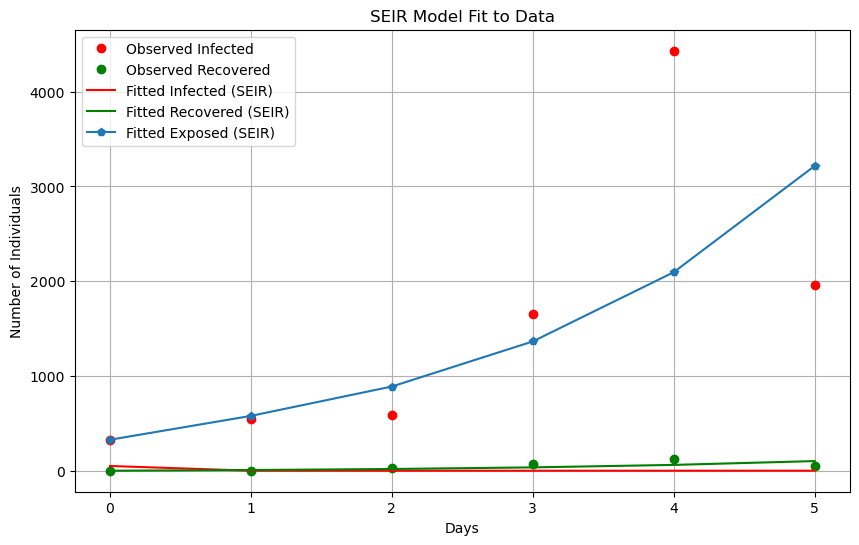

In [14]:
# choose a region or global
ts = country_daily.loc['Mainland China']

# convert dates to integer days from start
t0 = ts.index.min()
t = numpy.array([(d - t0).days for d in ts.index])

# arrays for fitting
C_cum = ts['C_cum'].values.astype(float)
I_cum = ts['I_cum'].values.astype(float)
R_cum = ts['R_cum'].values.astype(float)
D_cum = ts['D_cum'].values.astype(float)

print("Confirmed cumulative: ")
print(C_cum)
print("Infected cumulative: ")
print(I_cum)
print("Recovered cumulative: ")
print(R_cum)
print("Death cumulative: ")
print(D_cum)

# Ensure arrays are floats
t_data = t.astype(float)
I_data = I_cum.astype(float)
R_data = R_cum.astype(float)


# Population size
N = 1_411_780_000


# ----------------------------------------------------------------------
# STEP 2: INITIAL CONDITIONS FROM FIRST ELEMENT IN ARRAYS
# ----------------------------------------------------------------------
I0 = float(I_data[0])
R0 = float(R_data[0])
E0 = 50                        # guessed exposed
S0 = N - I0 - R0 - E0              # susceptible

y0 = [S0, E0, I0, R0]

# ----------------------------------------------------------------------
# STEP 4: ESTABLISH INITAL PARAMETER GUESSES
# ----------------------------------------------------------------------
beta0  = 0.5        # transmission rate estimate
sigma0 = 1/5        # incubation rate ≈ 1/5 days
gamma0 = 1/10       # recovery rate ≈ 1/10 days

params0 = numpy.array([beta0, sigma0, gamma0])


# ----------------------------------------------------------------------
# STEP 5: SOLVE USING ROOTFINDING TECHNIQUE
# ----------------------------------------------------------------------
# solution = root(residual, params0, method='hybr')
# cant use root, because we have 12 data points instead of 3
solution = least_squares(residual, params0, method='trf')

beta_hat, sigma_hat, gamma_hat = solution.x

print("\n==========================")
print("Estimated SEIR Parameters")
print("==========================")
print("β (transmission)      =", beta_hat)
print("σ (incubation rate)   =", sigma_hat)
print("γ (recovery rate)     =", gamma_hat)
print("--------------------------")
print("Rootfinding success:", solution.success)
print("Message:", solution.message)

# -----------------------------
# 6) Solve SEIR model with fitted parameters for plotting
# -----------------------------
S_fit, I_fit, E_fit, R_fit = solve_seir([beta_hat, sigma_hat, gamma_hat])

# -----------------------------
# 7) Plot results
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(t_data, I_data, 'ro', label='Observed Infected')
plt.plot(t_data, R_data, 'go', label='Observed Recovered')
# plt.plot(t_data, S_data, 'bo', label='Observed Susceptible')
plt.plot(t_data, I_fit, 'r-', label='Fitted Infected (SEIR)')
plt.plot(t_data, R_fit, 'g-', label='Fitted Recovered (SEIR)')
# plt.plot(t_data, S_fit, 'b-', label='Fitted Susceptible (SEIR)')
plt.plot(t_data, E_fit, 'p-', label='Fitted Exposed (SEIR)')
plt.xlabel('Days')
plt.ylabel('Number of Individuals')
plt.title('SEIR Model Fit to Data')
plt.legend()
plt.grid(True)
plt.show()

The SEIR model once again produces an extremely high incubation rate, which can be explained by the limited data overall and the lack of data on "exposed" individuals.

## Trying SEIR model on second dataset

In [15]:
df = pd.read_csv("time-series-19-covid-combined.csv")

df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)
df.head()
daily = df.groupby('Date')[['Confirmed','Recovered','Deaths']].sum()
daily = daily.sort_index()  # ascending by date

# Now we have daily cumulative totals:
# C(t) = Confirmed cumulative
daily.rename(columns={'Confirmed': 'C_cum', 'Recovered': 'R_cum', 'Deaths': 'D_cum'}, inplace=True)

# 5) Compute active infected I(t) = Confirmed - Recovered - Deaths
daily['I_cum'] = daily['C_cum'] - daily['R_cum'] - daily['D_cum']
daily['I_cum'] = daily['I_cum'].clip(lower=0)   # avoid negatives from dirty data
print(daily.head())

country_daily = (df.groupby(['Country/Region','Date'])[['Confirmed','Recovered','Deaths']]
                   .sum()
                   .sort_index()
                   .rename(columns={'Confirmed':'C_cum','Recovered':'R_cum','Deaths':'D_cum'}))
country_daily['I_cum'] = country_daily['C_cum'] - country_daily['R_cum'] - country_daily['D_cum']
print(country_daily.loc['US'])

Date              datetime64[ns]
Country/Region            object
Province/State            object
Lat                      float64
Long                     float64
Confirmed                  int64
Recovered                float64
Deaths                     int64
dtype: object
            C_cum  R_cum  D_cum   I_cum
Date                                   
2020-01-22    555   28.0     17   510.0
2020-01-23    654   30.0     18   606.0
2020-01-24    941   36.0     26   879.0
2020-01-25   1434   39.0     42  1353.0
2020-01-26   2118   52.0     56  2010.0
              C_cum      R_cum   D_cum      I_cum
Date                                             
2020-01-22        1        0.0       0        1.0
2020-01-23        1        0.0       0        1.0
2020-01-24        2        0.0       0        2.0
2020-01-25        2        0.0       0        2.0
2020-01-26        5        0.0       0        5.0
...             ...        ...     ...        ...
2020-10-13  7856605  3124593.0  215887  45

Initial values: [331449230.0, 50, 1.0, 0.0]

Estimated SEIR Parameters
β (transmission)      = 1.4128851725625344
σ (incubation rate)   = -0.18802497742755667
γ (recovery rate)     = 0.015583016280748534
--------------------------
Rootfinding success: True
Message: `ftol` termination condition is satisfied.


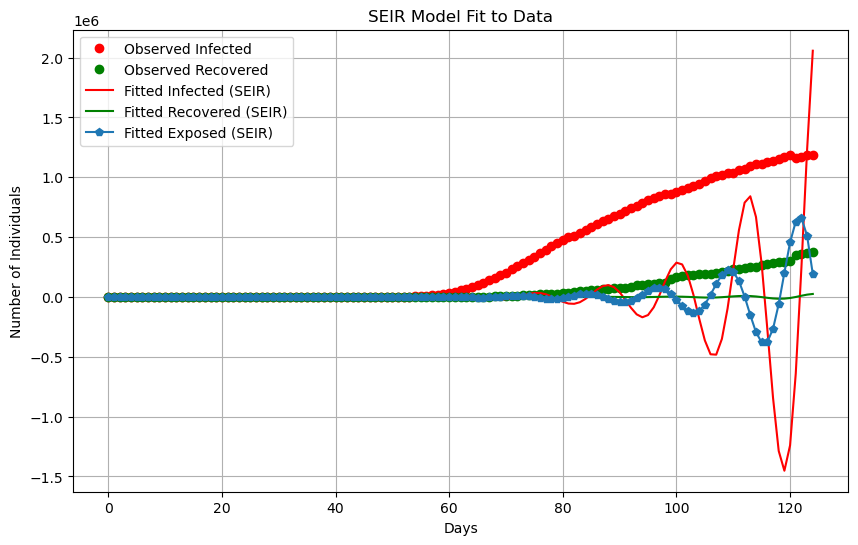

In [16]:
# choose a region or global
ts = country_daily.loc['US']

# convert dates to integer days from start
t0 = ts.index.min()
first_day = 0
last_day = 125 # max is 270
t = numpy.array([(d - t0).days for d in ts.index])[first_day:last_day]

# arrays for fitting
C_cum = ts['C_cum'].values.astype(float)[first_day:last_day]
I_cum = ts['I_cum'].values.astype(float)[first_day:last_day]
R_cum = ts['R_cum'].values.astype(float)[first_day:last_day]
D_cum = ts['D_cum'].values.astype(float)[first_day:last_day]

# print("Confirmed cumulative: ")
# print(C_cum)
# print("Infected cumulative: ")
# print(I_cum)
# print("Recovered cumulative: ")
# print(R_cum)
# print("Death cumulative: ")
# print(D_cum)

# Ensure arrays are floats
t_data = t.astype(float)
I_data = I_cum.astype(float)
R_data = R_cum.astype(float)


# Population size
N = 331_449_281


# ----------------------------------------------------------------------
# STEP 2: INITIAL CONDITIONS FROM FIRST ELEMENT IN ARRAYS
# ----------------------------------------------------------------------
I0 = float(I_data[first_day])
R0 = float(R_data[first_day])
E0 = 50                        # guessed exposed
S0 = N - I0 - R0 - E0              # susceptible

y0 = [S0, E0, I0, R0]
print("Initial values:", y0)

# ----------------------------------------------------------------------
# STEP 4: ESTABLISH INITAL PARAMETER GUESSES
# ----------------------------------------------------------------------
beta0  = 0.5        # transmission rate estimate
sigma0 = 1/5        # incubation rate ≈ 1/5 days
gamma0 = 1/10       # recovery rate ≈ 1/10 days

params0 = numpy.array([beta0, sigma0, gamma0])


# ----------------------------------------------------------------------
# STEP 5: SOLVE USING ROOTFINDING TECHNIQUE
# ----------------------------------------------------------------------
# solution = root(residual, params0, method='hybr')
# cant use root, because we have 12 data points instead of 3
# bounds = ([0, 0, 0], [numpy.inf, numpy.inf, numpy.inf])  # all params >= 0
solution = least_squares(residual, params0, method='trf')

beta_hat, sigma_hat, gamma_hat = solution.x

print("\n==========================")
print("Estimated SEIR Parameters")
print("==========================")
print("β (transmission)      =", beta_hat)
print("σ (incubation rate)   =", sigma_hat)
print("γ (recovery rate)     =", gamma_hat)
print("--------------------------")
print("Rootfinding success:", solution.success)
print("Message:", solution.message)

# -----------------------------
# 6) Solve SEIR model with fitted parameters for plotting
# -----------------------------
S_fit, I_fit, E_fit, R_fit = solve_seir([beta_hat, sigma_hat, gamma_hat])

# -----------------------------
# 7) Plot results
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(t_data, I_data, 'ro', label='Observed Infected')
plt.plot(t_data, R_data, 'go', label='Observed Recovered')
# plt.plot(t_data, S_data, 'bo', label='Observed Susceptible')
plt.plot(t_data, I_fit, 'r-', label='Fitted Infected (SEIR)')
plt.plot(t_data, R_fit, 'g-', label='Fitted Recovered (SEIR)')
# plt.plot(t_data, S_fit, 'b-', label='Fitted Susceptible (SEIR)')
plt.plot(t_data, E_fit, 'p-', label='Fitted Exposed (SEIR)')
plt.xlabel('Days')
plt.ylabel('Number of Individuals')
plt.title('SEIR Model Fit to Data')
plt.legend()
plt.grid(True)
plt.show()

## SEIR Model: Experimenting With Parameter Impacts
Now that we have investigated how we can estimate the SEIR model parameters, we can explore disease spread further by seeing how different values for parameters $R_0, \sigma, \gamma$ impact the model.

#### Experimenting with $R_0$ Basic  Reproduction Number
The graph below plots the infection rate $i(t)$ for different values of the basic reproduction number.

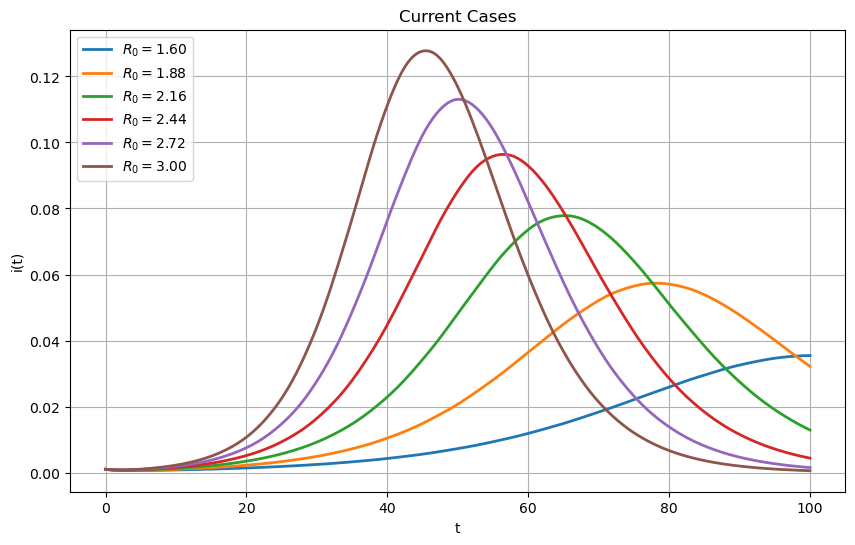

In [17]:
# parameters 

gamma = 1/4.0       # infectious period ~4 days
sigma = 1/5.2       # latent period ~5.2 days

R0_vals = numpy.linspace(1.6, 3.0, 6)   # like range(1.6, 3.0, length=6)

# initial conditions (scaled to sum to 1)
s0 = 0.999
e0 = 0.0
i0 = 0.001
r0 = 0.0
u0 = numpy.array([s0, e0, i0, r0])

t_span = (0, 100)
t_eval = numpy.arange(0, 100.1, 0.5)

# solve for each R0 

solutions = []
infecteds = []

for R0 in R0_vals:
    sol = solve_ivp(
        F, t_span, u0, t_eval=t_eval,
        args=(gamma, R0, sigma),
        method='RK45'
    )
    solutions.append(sol)
    infecteds.append(sol.y[2])  # i(t) = third component

# plotting
plt.figure(figsize=(10,6))

for R0, i_curve in zip(R0_vals, infecteds):
    plt.plot(t_eval, i_curve, linewidth=2, label=fr"$R_0 = {R0:.2f}$")

plt.xlabel("t")
plt.ylabel("i(t)")
plt.title("Current Cases")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


# code adapted from section 44.4.1 of https://julia.quantecon.org/continuous_time/seir_model.html
# The sampled code was written in Julia

The reproduction number represents the expected number of secondary cases produced by a single (typical) infection in a completely susceptible population. A lower reproduction number corresponds to a lower rate of spreading the disease, which results in the infection curve being flatter with a lower peak and also more stretched out (i.e., less people get infected and it takes longer to reach the peak). A higher reproduction number corresponds to a higher rate of spreading the disease, which results in the infection curve being steeper with a higher peak, but the population also reaches the infection peak quicker.

#### Experimenting with $\sigma$ Incubation Rate

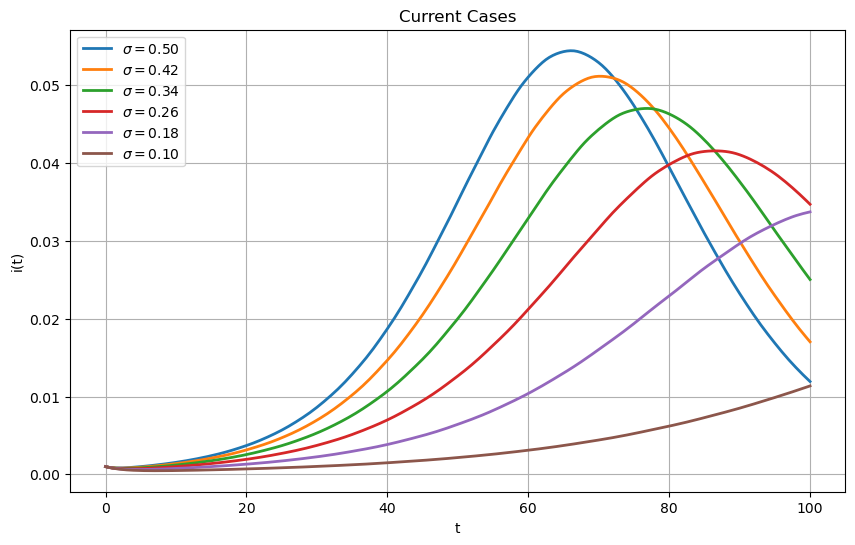

In [18]:
# parameters 

gamma = 1/4.0       # infectious period ~4 days
sigma_vals = numpy.linspace(1/2, 1/10, 6)       # latent period ~5.2 days

R0 = 1.6   # like range(1.6, 3.0, length=6)

# initial conditions (scaled to sum to 1)
s0 = 0.999
e0 = 0.0
i0 = 0.001
r0 = 0.0
u0 = numpy.array([s0, e0, i0, r0])

t_span = (0, 100)
t_eval = numpy.arange(0, 100.1, 0.5)

# solve for each R0 

solutions = []
infecteds = []

for s in sigma_vals:
    sol = solve_ivp(
        F, t_span, u0, t_eval=t_eval,
        args=(gamma, R0, s),
        method='RK45'
    )
    solutions.append(sol)
    infecteds.append(sol.y[2])  # i(t) = third component

# plotting
plt.figure(figsize=(10,6))

for s, i_curve in zip(sigma_vals, infecteds):
    plt.plot(t_eval, i_curve, linewidth=2, label=fr"$\sigma = {s:.2f}$")

plt.xlabel("t")
plt.ylabel("i(t)")
plt.title("Current Cases")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


# code adapted from section 44.4.1 of https://julia.quantecon.org/continuous_time/seir_model.html
# The sampled code was written in Julia

The incubation rate represents the rate at which the exposed population moves to the infected population. As the incubation rate increases, a greater percentage of the exposed population moves to the infected population, meaning the number of infected individuals will increase quicker (reach the infection peak quicker) and also have a higher infection peak.

#### Experimenting with $\gamma$ Infection Rate

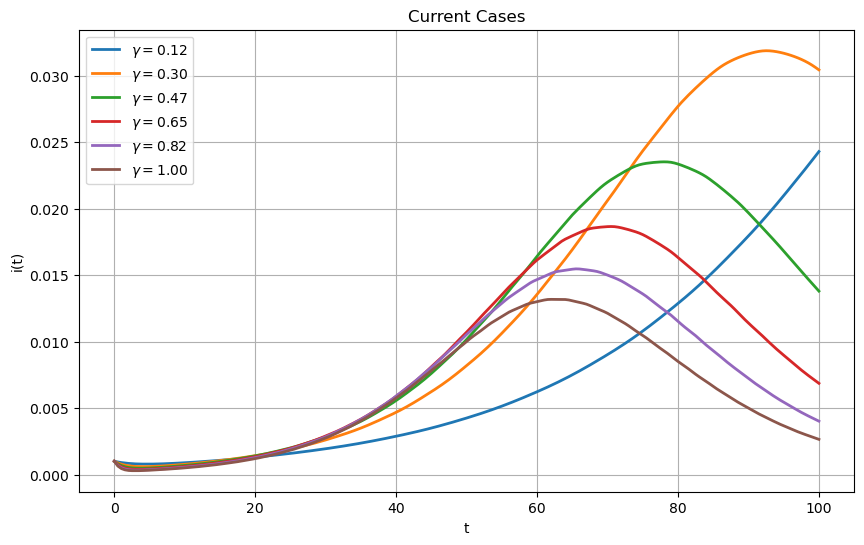

In [19]:
# parameters 

gamma_vals = numpy.linspace(1/8, 1, 6)       # infectious period ~4 days
sigma = 1/5.2       # latent period ~5.2 days

R0 = 1.6   # like range(1.6, 3.0, length=6)

# initial conditions (scaled to sum to 1)
s0 = 0.999
e0 = 0.0
i0 = 0.001
r0 = 0.0
u0 = numpy.array([s0, e0, i0, r0])

t_span = (0, 100)
t_eval = numpy.arange(0, 100.1, 0.5)

# solve for each R0 

solutions = []
infecteds = []

for g in gamma_vals:
    sol = solve_ivp(
        F, t_span, u0, t_eval=t_eval,
        args=(g, R0, sigma),
        method='RK45'
    )
    solutions.append(sol)
    infecteds.append(sol.y[2])  # i(t) = third component

# plotting
plt.figure(figsize=(10,6))

for g, i_curve in zip(gamma_vals, infecteds):
    plt.plot(t_eval, i_curve, linewidth=2, label=fr"$\gamma = {g:.2f}$")

plt.xlabel("t")
plt.ylabel("i(t)")
plt.title("Current Cases")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


# code adapted from section 44.4.1 of https://julia.quantecon.org/continuous_time/seir_model.html
# The sampled code was written in Julia

The recovery rate is the rate at which individuals move from the infected population to the removed population. A higher recovery rate corresponds to the infection curve being 

### Machine learning methods
The dataset we are using to create machine learning models is the same from our SEIR model investigations above, the JHU Covid-19 dataset. 

Our goal is to train a regression model that can predict continuous outcomes.

The dataset includes the following columns: 
1. Province/State
2. Country
3. Date last updated
4. Confirmed
5. Suspected
6. Recovered
7. Deaths

Given this data, we want to predict the number of confirmed cases to forecast future trends in the disease. This forecasted information would be helpful for understand what resources are needed to support possible patients. 


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import re

# 1. Load dataset
file_path = "2019_nC0v_20200121_20200126 - SUMMARY.csv"
df = pd.read_csv(file_path)

print("==========Data before cleaning==========")
print(df.head())
print("")
# 2. Basic cleaning / parsing

# Handling NaN
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Suspected'] = df['Suspected'].fillna(0)
df['Recovered'] = df['Recovered'].fillna(0)
df['Deaths'] = df['Deaths'].fillna(0)
df['Province/State'] = df['Province/State'].fillna("Unknown")

# Handling Strings -> Ints using factorize
df['Province/State'], province_mapping = pd.factorize(df['Province/State'])
df['Country'], province_mapping = pd.factorize(df['Country'])

# Convert date column to datetime # format = %m/%d/%Y %H:%M'
# (Same as in SEIR section above)

def clean_date(x):
    # 1. Extract only the MM/DD/YY or MM/DD/YYYY portion
    match = re.search(r'(\d+/\d+/\d+)', x)
    if not match:
        return None  # or raise an error
    date_str = match.group(1)
    
    # 2. Fix 2-digit years (your rule: always 2020)
    parts = date_str.split('/')
    if len(parts[2]) == 2:      # e.g., "20"
        parts[2] = '2020'
    
    # 3. Return unified format: M/D/YYYY
    return f"{int(parts[0])}/{int(parts[1])}/{parts[2]}"

df['Date last updated'] = df['Date last updated'].astype(str).apply(clean_date)
df['Date last updated'] = pd.to_datetime(df['Date last updated'], format="%m/%d/%Y")

# # Sort by date (important for forecasting)
df = df.sort_values(by="Date last updated")

print("==========Data after cleaning==========")
print(df.head())
print("")

==========Data before cleaning==========
  Province/State         Country Date last updated  Confirmed  Suspected  \
0       Shanghai  Mainland China         1/21/2020        9.0       10.0   
1         Yunnan  Mainland China         1/21/2020        1.0        NaN   
2        Beijing  Mainland China         1/21/2020       10.0        NaN   
3         Taiwan  Mainland China         1/21/2020        1.0        NaN   
4          Jilin  Mainland China         1/21/2020        NaN        1.0   

   Recovered  Deaths  
0        NaN     NaN  
1        NaN     NaN  
2        NaN     NaN  
3        NaN     NaN  
4        NaN     NaN  

==========Data after cleaning==========
    Province/State  Country Date last updated  Confirmed  Suspected  \
0                0        0        2020-01-21        9.0       10.0   
26              24        4        2020-01-21        1.0        0.0   
25              23        3        2020-01-21        1.0        0.0   
24              23        2        2020

In [21]:
# 3. Create simple numeric features for forecasting
# Convert date to an ordinal number (days since 1970)
df['date_ordinal'] = df['Date last updated'].map(pd.Timestamp.toordinal)

# Optionally encode categorical variables (province/state, country)
df = pd.get_dummies(df, columns=['Province/State', 'Country'], drop_first=True)

# 4. Define features (X) and target (y)
X = df.drop(columns=['Confirmed', 'Date last updated'])
y = df['Confirmed']


# 5. Split into train → validation → test
# First split: Train/Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, shuffle=False  # no shuffle because time-series
)

# Second split: Validation/Test (each 15% of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, shuffle=False
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


# 6. Feature engineering; Scaling numeric features
scaler = StandardScaler()
numeric_cols = ['Suspected', 'Recovered', 'Deaths', 'date_ordinal']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Data ready for modeling!")

Train size: 257
Validation size: 55
Test size: 56
Data ready for modeling!


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create and train the model
def run_linear_regression(X_train, y_train, X_val, y_val, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    
    # 2. Evaluate on validation set
    y_pred_val = model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred_val)
    max_y = numpy.max(y_val)
    val_nmse = mse / (max_y**2)
    r2 = r2_score(y_val, y_pred_val)

    print("\n===== Validation Results =====")
    print("Validation MSE:", mse)
    print("Validation Normalized MSE:", val_nmse)
    print("Validation R²:", r2)
    
    
    # 3. Evaluate on test set
    y_pred_test = model.predict(X_test)
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    max_y = numpy.max(y_test)
    test_nmse = mse_test / (max_y**2)
    r2_test = r2_score(y_test, y_pred_test)

    print("\n===== Test Results =====")
    print("Test MSE:", mse_test)
    print("Test Normalized MSE:", test_nmse)
    print("Test R²:", r2_test)

run_linear_regression(X_train, y_train, X_val, y_val, X_test, y_test)


===== Validation Results =====
Validation MSE: 433.9138983739136
Validation Normalized MSE: 0.0008164855522511691
Validation R²: 0.9532933921194696

===== Test Results =====
Test MSE: 596.6901040364652
Test Normalized MSE: 0.0005330617243688963
Test R²: 0.9791931806155526


In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 7. Build a neural network regressor
def run_NN_regressor(X_train, y_train, X_val, y_val, X_test, y_test):
    model = MLPRegressor(
        hidden_layer_sizes=(64, 32, 16),   # 3 hidden layers
        activation='relu',
        solver='adam',
        learning_rate='adaptive',
        max_iter=5000,
        random_state=42
    )
    
    # 8. Train the model
    print("Training neural network...")
    model.fit(X_train, y_train)
    
    # 9. Evaluate on validation set
    val_pred = model.predict(X_val)
    max_y = numpy.max(y_val)

    val_mse = mean_squared_error(y_val, val_pred)
    val_nmse = val_mse / (max_y**2)

    val_r2 = r2_score(y_val, val_pred)
    
    print("\n===== Validation Results =====")
    print("Validation MSE:", val_mse)
    print("Validation Normalized MSE:", val_nmse)
    print("Validation R²:", val_r2)
    
    # 10. Evaluate on test set
    test_pred = model.predict(X_test)
    max_y = numpy.max(y_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_nmse = test_mse / (max_y**2)
    test_r2 = r2_score(y_test, test_pred)
    
    print("\n===== Test Results =====")
    print("Test MSE:", test_mse)
    print("Test Normalized MSE:", test_nmse)
    print("Test R²:", test_r2)

run_NN_regressor(X_train, y_train, X_val, y_val, X_test, y_test)

Training neural network...

===== Validation Results =====
Validation MSE: 310.91652542137217
Validation Normalized MSE: 0.0005850442954558872
Validation R²: 0.9665328621856699

===== Test Results =====
Test MSE: 301.7686680654965
Test Normalized MSE: 0.0002695893990386474
Test R²: 0.9894772074652334


#### Testing Linear Regression Model + NN on second dataset

In [24]:
# 1. Load dataset
file_path = "time-series-19-covid-combined.csv"
df = pd.read_csv(file_path)

print("==========Data before cleaning==========")
print(df.head())
print("")
# 2. Basic cleaning / parsing

# Handling NaN
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Recovered'] = df['Recovered'].fillna(0)
df['Deaths'] = df['Deaths'].fillna(0)
df['Country/Region'] = df['Country/Region'].fillna("Unknown")

# Handling Strings -> Ints using factorize
df['Province/State'], province_mapping = pd.factorize(df['Province/State'])
df['Country/Region'], province_mapping = pd.factorize(df['Country/Region'])

# Convert date column to datetime # format = %m/%d/%Y %H:%M'
# (Same as in SEIR section above)

df['Date'] = pd.to_datetime(df['Date'])

# # Sort by date (important for forecasting)
df = df.sort_values(by="Date")

print("==========Data after cleaning==========")
print(df.head())
print("")

==========Data before cleaning==========
         Date Country/Region Province/State       Lat       Long  Confirmed  \
0  2020-01-22    Afghanistan            NaN  33.93911  67.709953          0   
1  2020-01-23    Afghanistan            NaN  33.93911  67.709953          0   
2  2020-01-24    Afghanistan            NaN  33.93911  67.709953          0   
3  2020-01-25    Afghanistan            NaN  33.93911  67.709953          0   
4  2020-01-26    Afghanistan            NaN  33.93911  67.709953          0   

   Recovered  Deaths  
0        0.0       0  
1        0.0       0  
2        0.0       0  
3        0.0       0  
4        0.0       0  

==========Data after cleaning==========
            Date  Country/Region  Province/State        Lat       Long  \
0     2020-01-22               0              -1  33.939110  67.709953   
13230 2020-01-22              32              18  46.510700 -63.416800   
58860 2020-01-22             150              -1  -4.679600  55.492000   
12960 202

In [25]:
# 3. Create simple numeric features for forecasting
# Convert date to an ordinal number (days since 1970)
df['date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Optionally encode categorical variables (province/state, country)
df = pd.get_dummies(df, columns=['Country/Region'], drop_first=True)

# 4. Define features (X) and target (y)
X = df.drop(columns=['Confirmed', 'Date'])
y = df['Confirmed']


# 5. Split into train → validation → test
# First split: Train/Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, shuffle=False  # no shuffle because time-series
)

# Second split: Validation/Test (each 15% of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, shuffle=False
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


# 6. Feature engineering; Scaling numeric features
scaler = StandardScaler()
numeric_cols = ['Recovered', 'Deaths', 'date_ordinal']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Data ready for modeling!")

Train size: 50463
Validation size: 10813
Test size: 10814
Data ready for modeling!


In [26]:
print("Linear Regression Results")
run_linear_regression(X_train, y_train, X_val, y_val, X_test, y_test)
print("NN Results"
run_NN_regressor(X_train, y_train, X_val, y_val, X_test, y_test)


===== Validation Results =====
Validation MSE: 9878391737.40353
Validation Normalized MSE: 0.0002503982476337163
Validation R²: 0.9484091845291167

===== Test Results =====
Test MSE: 22384163689.26531
Test Normalized MSE: 0.0003406328499431608
Test R²: 0.9477322306221408
Training neural network...

===== Validation Results =====
Validation MSE: 1778602682.4596024
Validation Normalized MSE: 4.5084160130864715e-05
Validation R²: 0.9907110828132728

===== Test Results =====
Test MSE: 12039428150.173553
Test Normalized MSE: 0.0001832109869910506
Test R²: 0.9718875334039683


From the results above, we see that the neural network performed better than the linear regression model. This may be because they can capture non-linear relationships in the data. While linear regression assumes a linear mapping between input features and the target, neural networks with non-linear activation functions can approximate complex, non-linear dynamics. Epidemic data, such as COVID-19 infection growth and recovery rates, often follow such non-linear patterns, which a neural network can model more accurately than a simple linear approach.

In addition, neural networks automatically learn interactions between features and have higher capacity and flexibility due to multiple layers and parameters. This allows them to fit intricate patterns that linear regression cannot capture without manual feature engineering. With appropriate training techniques and regularization, neural networks can generalize well, as reflected in the higher $R^{2}$ and lower MSE on both validation and test sets, indicating they capture the underlying signal in the epidemic data more effectively.

## Machine Learning: Interpolation to Augment Datasets
Another numerical method we plan to use is interpolation; we would like to explore is how datasets can be augmented using interpolation to fill in missing values. We will then compare the results of the same machine learning models when trained and tested on the original vs. augmented datasets.

When examining the JHU dataset, the primary columns that have missing values where interpolation could be applied are:

- 

In [27]:
file_path = "2019_nC0v_20200121_20200126 - SUMMARY.csv"
df = pd.read_csv(file_path)

print("==========Data before interpolation==========")
print(df.head())
print("")

# Convert date column to datetime

def clean_date(x):
    # 1. Extract only the MM/DD/YY or MM/DD/YYYY portion
    match = re.search(r'(\d+/\d+/\d+)', x)
    if not match:
        return None  # or raise an error
    date_str = match.group(1)
    
    # 2. Fix 2-digit years (your rule: always 2020)
    parts = date_str.split('/')
    if len(parts[2]) == 2:      # e.g., "20"
        parts[2] = '2020'
    
    # 3. Return unified format: M/D/YYYY
    return f"{int(parts[0])}/{int(parts[1])}/{parts[2]}"

df['Date last updated'] = df['Date last updated'].astype(str).apply(clean_date)
df['Date last updated'] = pd.to_datetime(df['Date last updated'], format="%m/%d/%Y")

# Interpolate within each province over time
cols = ["Confirmed", "Suspected", "Recovered", "Deaths"]

df_linear_interpolated = df.sort_values(["Province/State", "Date last updated"])

df_linear_interpolated[cols] = (
    df_linear_interpolated.groupby("Province/State")[cols]
    .transform(lambda g: g.interpolate(method="linear"))
)

# Handling NaN
df_linear_interpolated['Confirmed'] = df_linear_interpolated['Confirmed'].fillna(0)
df_linear_interpolated['Suspected'] = df_linear_interpolated['Suspected'].fillna(0)
df_linear_interpolated['Recovered'] = df_linear_interpolated['Recovered'].fillna(0)
df_linear_interpolated['Deaths'] = df_linear_interpolated['Deaths'].fillna(0)
df_linear_interpolated['Province/State'] = df_linear_interpolated['Province/State'].fillna("Unknown")


print("==========Data after linear interpolation==========")
print(df_linear_interpolated.head())
print("")



==========Data before interpolation==========
  Province/State         Country Date last updated  Confirmed  Suspected  \
0       Shanghai  Mainland China         1/21/2020        9.0       10.0   
1         Yunnan  Mainland China         1/21/2020        1.0        NaN   
2        Beijing  Mainland China         1/21/2020       10.0        NaN   
3         Taiwan  Mainland China         1/21/2020        1.0        NaN   
4          Jilin  Mainland China         1/21/2020        NaN        1.0   

   Recovered  Deaths  
0        NaN     NaN  
1        NaN     NaN  
2        NaN     NaN  
3        NaN     NaN  
4        NaN     NaN  

==========Data after linear interpolation==========
    Province/State         Country Date last updated  Confirmed  Suspected  \
8            Anhui  Mainland China        2020-01-21        0.0        3.0   
27           Anhui  Mainland China        2020-01-22        1.0        4.0   
65           Anhui  Mainland China        2020-01-23        9.0        4

We now run the neural network model again on the linearly interpolated data

In [28]:
# 3. Create simple numeric features for forecasting
# Convert date to an ordinal number (days since 1970)
df_linear_interpolated['date_ordinal'] = df_linear_interpolated['Date last updated'].map(pd.Timestamp.toordinal)

# Optionally encode categorical variables (province/state, country)
df_linear_interpolated = pd.get_dummies(df_linear_interpolated, columns=['Province/State', 'Country'], drop_first=True)

# 4. Define features (X) and target (y)
X = df_linear_interpolated.drop(columns=['Confirmed', 'Date last updated'])
y = df_linear_interpolated['Confirmed']


# 5. Split into train → validation → test
# First split: Train/Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, shuffle=False  # no shuffle because time-series
)

# Second split: Validation/Test (each 15% of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, shuffle=False
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


# 6. Feature engineering; Scaling numeric features
scaler = StandardScaler()
numeric_cols = ['Suspected', 'Recovered', 'Deaths', 'date_ordinal']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Data ready for modeling!")

Train size: 257
Validation size: 55
Test size: 56
Data ready for modeling!


In [29]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 7. Build a neural network regressor
model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),   # 3 hidden layers
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=5000,
    random_state=42
)

# 8. Train the model
print("Training neural network...")
model.fit(X_train, y_train)

# 9. Evaluate on validation set
val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)
val_r2 = r2_score(y_val, val_pred)

print("\n===== Validation Results =====")
print("Validation MSE:", val_mse)
print("Validation R²:", val_r2)

# 10. Evaluate on test set
test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("\n===== Test Results =====")
print("Test MSE:", test_mse)
print("Test R²:", test_r2)


Training neural network...

===== Validation Results =====
Validation MSE: 355.1657084133322
Validation R²: 0.30960668563384064

===== Test Results =====
Test MSE: 155.47512448630343
Test R²: 0.0


## Discussion [15 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you might do to fix it.


*Note: More targetting discussion corresponding to our exploration can be found in the implementation section*


For this project, we explored the SEIR model by using computational methods such as computing the dynamical system using both Python libraries and iterative methods, estimating parameter values for the SEIR model using rootfinding techniques, and experimenting with varying parameters for SEIR models. Though we experienced challenges when estimating parameter values for an SEIR model when applied to a specific data set, we were successful with our other investigations.

**SEIR Model: Successes**

When writing code to compute the dynamical system that represented an SEIR model, we were able to compare the results from the method using solve_ivp and the method using RK-4 to test correctness. Furthermore, experimenting with varying parameters ($\sigma, \gamma, R_0$) in the SEIR model, we were able to visually confirm the impact of different parameter values on infection rate by examining plots produced by matplotlib. 

**SEIR Model: Challenges and Next Steps**

The main challenge we faced when estimating parameter values $\beta$ (transmission), $\sigma$  (incubation rate), and $\gamma$ (recovery rate) for an SEIR model corresponding to a specific dataset was that the calculated incubation rates were abnormally high. However, this could be due to limitations of the dataset; the first dataset (JHU Covid-19) only spanned across 6 days of data. Additionally, there were missing elements of the data, such as the number of exposed individuals, as well as a concrete value for the population size for the system. As initial workarounds, we provided estimates for the number of exposed individuals and population size based on the countries that were part of the dataset. However, in the future, testing rootfinding methods for SEIR model parameters on more robust datasets could help mitigate this issue. 


